### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'1.12.0'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [5]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [6]:
trainY = tf.keras.utils.to_categorical(trainY)
testY = tf.keras.utils.to_categorical(testY)

In [7]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [8]:
trainX.shape

(60000, 28, 28)

In [9]:
len(trainY)

60000

In [10]:
testX.shape

(10000, 28, 28)

In [11]:
len(testY)

10000

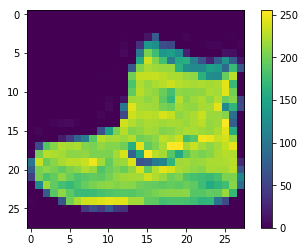

In [14]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(trainX[0])
plt.colorbar()
plt.grid(False)

In [38]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

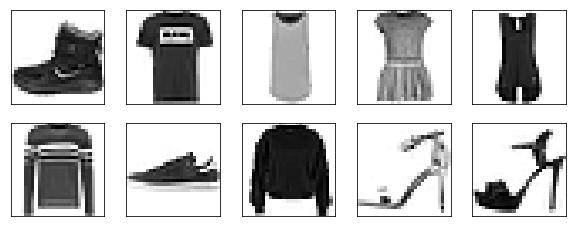

In [43]:

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    #plt.xlabel(class_names[trainY[i]])

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [16]:
model =  tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28),name='fc1'))
model.add(tf.keras.layers.Dense(128, activation='relu',name='fc2'))
model.add(tf.keras.layers.Dense(10, activation='softmax',name='output'))

model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Flatten)                (None, 784)               0         
_________________________________________________________________
fc2 (Dense)                  (None, 128)               100480    
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

### Execute the model using model.fit()

In [18]:
model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 65us/step - loss: 14.5033 - acc: 0.1002 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/5
60000/60000 [==============================] - 4s 66us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/5
60000/60000 [==============================] - 4s 68us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/5
60000/60000 [==============================] - 4s 65us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/5
60000/60000 [==============================] - 4s 60us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [19]:
model =  tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28),name='fc1'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation='relu',name='fc2'))
model.add(tf.keras.layers.Dense(10, activation='softmax',name='output'))

model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Flatten)                (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
fc2 (Dense)                  (None, 128)               100480    
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 104,906
Trainable params: 103,338
Non-trainable params: 1,568
_________________________________________________________________


### Execute the model

In [20]:
model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.5620 - acc: 0.8029 - val_loss: 0.4533 - val_acc: 0.8420
Epoch 2/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.4225 - acc: 0.8492 - val_loss: 0.4171 - val_acc: 0.8537
Epoch 3/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.3879 - acc: 0.8620 - val_loss: 0.4041 - val_acc: 0.8569
Epoch 4/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.3650 - acc: 0.8690 - val_loss: 0.3894 - val_acc: 0.8618
Epoch 5/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.3498 - acc: 0.8745 - val_loss: 0.3753 - val_acc: 0.8662


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [21]:

sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(loss='categorical_crossentropy',optimizer=sgd_optimizer,metrics=['accuracy'])


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Flatten)                (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
fc2 (Dense)                  (None, 128)               100480    
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 104,906
Trainable params: 103,338
Non-trainable params: 1,568
_________________________________________________________________


In [22]:
model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.3283 - acc: 0.8822 - val_loss: 0.3733 - val_acc: 0.8670
Epoch 2/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.3269 - acc: 0.8818 - val_loss: 0.3730 - val_acc: 0.8682
Epoch 3/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.3235 - acc: 0.8842 - val_loss: 0.3682 - val_acc: 0.8684
Epoch 4/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.3238 - acc: 0.8829 - val_loss: 0.3699 - val_acc: 0.8693
Epoch 5/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.3217 - acc: 0.8846 - val_loss: 0.3677 - val_acc: 0.8702


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [23]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,),name='fc1'))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [24]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [25]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [26]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [27]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model.compile(loss='categorical_crossentropy',optimizer=sgd_optimizer,metrics=['accuracy'])


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Reshape)                (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


## Review model

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Reshape)                (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [30]:
model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 83us/step - loss: 1.0581 - acc: 0.6845 - val_loss: 0.6349 - val_acc: 0.7803
Epoch 2/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.5712 - acc: 0.7981 - val_loss: 0.5144 - val_acc: 0.8154
Epoch 3/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.4910 - acc: 0.8256 - val_loss: 0.4664 - val_acc: 0.8300
Epoch 4/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.4554 - acc: 0.8369 - val_loss: 0.4425 - val_acc: 0.8397
Epoch 5/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.4266 - acc: 0.8477 - val_loss: 0.4281 - val_acc: 0.8440


In [31]:
# Evaluate the model on test set
score = model.evaluate(testX, testY, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.844


In [32]:
predictions=model.predict(testX)

In [33]:
predictions

array([[1.4912714e-04, 2.6124599e-04, 3.3231397e-04, ..., 1.6850790e-01,
        6.4705457e-03, 7.1682036e-01],
       [1.0429561e-03, 3.6549121e-05, 9.5133060e-01, ..., 1.2251532e-05,
        3.0389146e-04, 1.7972676e-05],
       [4.5547570e-04, 9.9781644e-01, 1.7042233e-04, ..., 2.4125898e-04,
        3.2812673e-05, 2.0380967e-05],
       ...,
       [2.6904935e-02, 5.8011621e-05, 2.3224596e-03, ..., 3.1653553e-04,
        8.5082465e-01, 7.9837942e-04],
       [2.1243785e-04, 9.9264902e-01, 2.1530513e-04, ..., 4.9277541e-04,
        1.1714743e-05, 5.3498807e-05],
       [5.7973524e-05, 1.7934876e-04, 8.6182076e-04, ..., 8.7429374e-02,
        3.3632994e-03, 4.8796213e-03]], dtype=float32)

In [34]:
import numpy as np
np.argmax(predictions[0])

9

In [35]:
np.argmax(testY[0])

9